# CEO-Request Challenge

## 1. Problem statement (summarized)

>❓ How should Olist improve its profit margin ❓, given that it has 
> - some revenues per sellers per months
> - some revenues per orders
> - some reputation costs (estimated) per bad reviews
> - some operational costs of IT system that grows with number of orders, but not linearly (scale effects)


Let's recap our key findings so far :
- We have seen that `wait_time` was the most significant factor behind low review scores, but reading comments of the bad reviews also showed that some of them were linked to the seller or to the product itself.
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`. The latter being outside of Olist's direct control, improving it is not a quick-win recommendation we can make to Olist CEO without in-depth analysis of their operational practices.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.

👉 We recommend you to start with the the seller analysis 1.1) below, but feel free to investigate into other hypothesis instead 1.2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
from olist.seller_updated import Seller as SellerUpdated
sellers = SellerUpdated().get_training_data()
#sellers

In [3]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)
#orders.head()

In [4]:
from olist.order_updated import Order
orders1 = Order().get_training_data(with_distance_seller_customer=True)
#orders1.head()

In [6]:
orders1['order_purchase_timestamp']=orders1['order_purchase_timestamp'].astype('datetime64')

In [7]:
orders1['order_purchase_month'] = orders1['order_purchase_timestamp'].dt.month
#orders1.head()

In [8]:
os = orders1.merge(sellers,on="seller_id")
os

,order_id,wait_time_x,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score_x,number_of_products,number_of_sellers,...,share_of_one_stars,share_of_five_stars,review_score_y,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.000000,delivered,0,0,4,1,1,...,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,320.0,180.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.000000,delivered,0,0,4,1,1,...,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,1120.0,880.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.000000,delivered,1,0,5,1,1,...,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,0.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.000000,delivered,1,0,5,1,1,...,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,0.0,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.000000,delivered,1,0,5,1,1,...,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,0.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,397f4ed009841e83e71435ab9376cc8c,6.094537,31.227280,0.000000,delivered,1,0,5,1,1,...,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,0.0,0.0
2962,4f39a94d6e474819d898d6df7d394996,143.893229,31.313854,112.579375,delivered,0,0,2,2,1,...,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1120.0,980.0
2963,223b2b4c06ffe3ced7307cad0ebd5e44,16.887894,29.034537,0.000000,delivered,1,0,5,1,1,...,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,400.0,400.0
2964,cc85879fb8f1767ad9b67dbcfa113e7b,10.340220,26.439688,0.000000,delivered,1,0,5,1,1,...,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,320.0,270.0


In [9]:

# Increase prices
# Protect profit 
# Stop discounting,Reduce your running costs
# Add more sellers


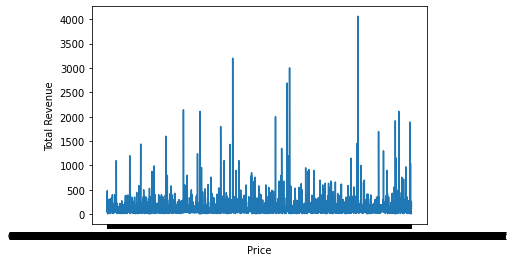

In [10]:
# Find avg revenue amount per month for a seller
# Grouping by seller_id & order_purchase_month, sum of all orders (by count and revenue) per seller per month


total_revenue = os.groupby(['seller_id','order_purchase_month'], as_index=False)['price'].sum()

#total_revenue

x=total_revenue['seller_id']

y1=total_revenue['order_purchase_month']

y2=total_revenue['price']

plt.ylabel('Total Revenue')
plt.xlabel('Price')

plt.plot(x,y2)



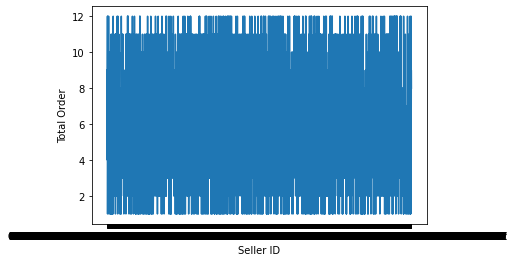

In [11]:
# Count and revenue per seller per month

total_orders = os.groupby(['seller_id','order_purchase_month'], as_index=False)['order_id'].count()
total_orders

x=total_orders['seller_id']

y1=total_orders['order_purchase_month']

y2=total_orders['order_id']

plt.ylabel('Total Order')
plt.xlabel('Seller ID')

plt.plot(x,y1)






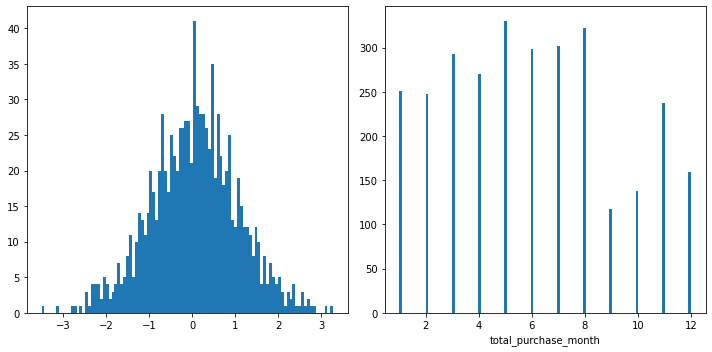

In [12]:
# Total_revenue
# Total_orders


import numpy as np
import matplotlib.pyplot as plt

# https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html
a = np.random.randn(1000) # conforms to the normal distribution
b = total_orders['order_purchase_month']

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(a, bins=100)
ax2.hist(b, bins=100)


plt.xlabel('total_orders_month')
plt.xlabel('total_purchase_month')


fig.tight_layout()
plt.show()

Text(0.5, 0, 'seller count')

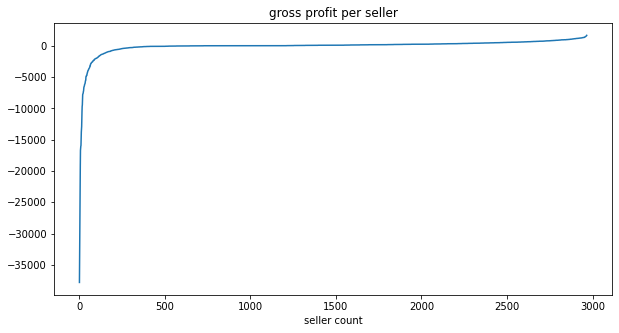

In [51]:
# Check profit per sellers

sorted_sellers = sellers.sort_values(by='profits')[['profits', 'n_orders', 'revenues']].reset_index()
#sorted_sellers.head()

plt.figure(figsize=(10,5))

sorted_sellers.profits.plot()

plt.title('gross profit per seller')
plt.xlabel('seller count')


In [33]:
sellers = sellers.sort_values(by = 'profits')

profit = A * (sellers[:]['n_orders'].sum()**0.5)

benef = sellers.profits.sum() - it_costs 

benef

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,0.143809,0.482510,3.827873,39400,1806,1987,1.100221,200472.92,1600.0,-37800.0
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,0.124729,0.514100,3.937093,35290,1854,2033,1.096548,123304.83,1440.0,-33850.0
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,0.116092,0.584483,4.077586,29530,1706,1775,1.040445,104288.42,1520.0,-28010.0
1132,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,0.0,22.392546,2017-01-26 22:55:10,2018-08-08 03:10:34,18.0,0.199593,0.351324,3.488798,28250,982,1364,1.389002,187923.89,1440.0,-26810.0
453,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,0.0,15.571831,2017-04-03 22:15:14,2018-08-28 03:45:18,17.0,0.112536,0.600427,4.130342,21980,1404,1931,1.375356,106939.21,1360.0,-20620.0


In [34]:
import math

# it_costs = A * (sellers['n_orders'].sum()**0.5)
it_costs = 500000

num_orders = sellers['n_orders'].sum()

A = it_costs / math.sqrt(num_orders)

A

1582.3973364219244

In [35]:
import math

# it_costs = A * (sellers['n_orders'].sum()**0.5)
it_costs = 500000

num_orders = sellers['n_orders'].sum()

A = it_costs / math.sqrt(num_orders)

A

1582.3973364219244

In [36]:
# Profits - IT Costs

it_costs = A * (sellers[:]['n_orders'].sum()**0.5)

benef = sellers.profits.sum() - it_costs 

benef

-687970.0

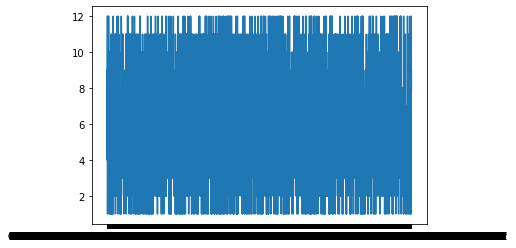

In [16]:
combined = total_revenue.merge(total_orders, on=['seller_id','order_purchase_month'])
combined

x=combined['seller_id']

y1=combined['order_purchase_month']



# plt.ylabel('Total Order')
# plt.xlabel('Selle ID')

plt.plot(x,y1)

In [17]:
# Iteratively removing worst sellers by slicing dataframe
sellers_removed = []
total_benefits = []

for i in range(len(sellers)):
    
    # Recalculate benefits
    benefits = sellers[i:].profits.sum() - A * (sellers[i:]['n_orders'].sum()**0.5)
    
    # Append recalculated profits and # of sellers removed to respective lists
    total_benefits.append(benefits)
    sellers_removed.append(i)

In [22]:
combined.rename(columns = {'price':'total_sales_amt','order_id':'count_of_orders'}, inplace=True)
combined

,seller_id,order_purchase_month,total_sales_amt,count_of_orders
0,0015a82c2db000af6aaaf3ae2ecb0532,9,160.99,1
1,001cca7ae9ae17fb1caed9dfb1094831,6,150.00,1
2,002100f778ceb8431b7a1020ff7ab48f,4,480.65,1
3,003554e2dce176b5555353e4f3555ac8,12,37.90,1
4,004c9cd9d87a3c30c522c48c4fc07416,12,185.90,1
...,...,...,...,...
2961,ffc470761de7d0232558ba5e786e57b7,2,66.39,1
2962,ffdd9f82b9a447f6f8d4b91554cc7dd3,12,138.00,1
2963,ffeee66ac5d5a62fe688b9d26f83f534,5,6.00,1
2964,fffd5413c0700ac820c7069d66d98c89,9,259.90,1


Text(0, 0.5, 'total benefits')

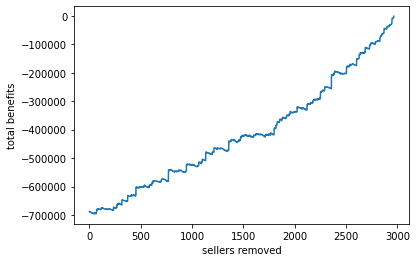

In [23]:
# Plot total benefits

plt.plot(sellers_removed,total_benefits)
plt.xlabel('sellers removed')
plt.ylabel('total benefits')

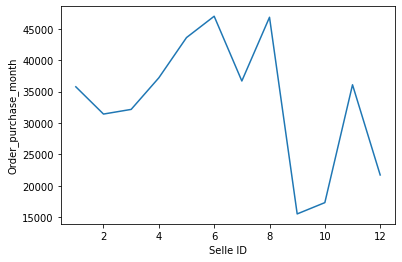

In [29]:
# Sum_Monthly_Revenue 


monthly_revenue = combined.groupby('order_purchase_month', as_index=False)['total_sales_amt'].sum() 


x=monthly_revenue['order_purchase_month']

y1=monthly_revenue['total_sales_amt']



plt.ylabel('Order_purchase_month')
plt.xlabel('Selle ID')

plt.plot(x,y1)


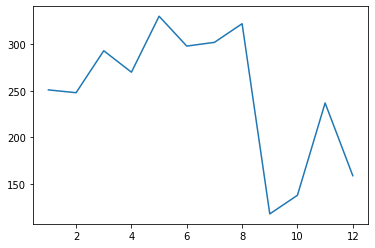

In [45]:
#seller_count

seller_count = combined.groupby('order_purchase_month', as_index=False)['seller_id'].count()
seller_count 

x=seller_count ['order_purchase_month']

y1=seller_count ['seller_id']



# plt.ylabel('avg_o')
# plt.xlabel('Selle ID')

plt.plot(x,y1)



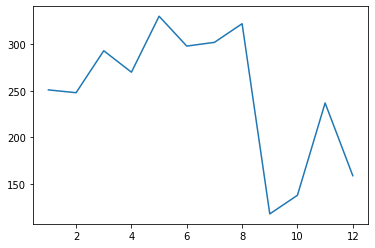

In [41]:

avg_seller_LTV = monthly_revenue.merge(seller_count, on='order_purchase_month')
avg_seller_LTV 

x=avg_seller_LTV['order_purchase_month']
y1=avg_seller_LTV['seller_id']
y2=avg_seller_LTV['total_sales_amt']


plt.plot(x,y1)



In [47]:
avg_seller_LTV.rename(columns = {'seller_id':'seller_count'}, inplace=True)
avg_seller_LTV





,order_purchase_month,total_sales_amt,seller_count
0,1,35769.54,251
1,2,31431.04,248
2,3,32172.54,293
3,4,37199.43,270
4,5,43603.76,330
5,6,46998.44,298
6,7,36694.65,302
7,8,46837.82,322
8,9,15539.48,118
9,10,17337.69,138


In [48]:
# avg_seller_LTV['avg_rev_per_seller'] = avg_seller_LTV['total_sales_amt'] / avg_seller_LTV['seller_count']
# avg_seller_LTV






In [49]:
#revenues per sellers per months

# Assume average of 7 months for each seller - provided

# Find avg revenue amount per month for a seller

# Grouping by seller_id & order_purchase_month, sum of all orders (by count and revenue) per seller per month
total_revenue = os.groupby(['seller_id','order_purchase_month'], as_index=False)['price'].sum()
total_orders = os.groupby(['seller_id','order_purchase_month'], as_index=False)['order_id'].count()

# Combine queries to summarize
combined = total_revenue.merge(total_orders, on=['seller_id','order_purchase_month'])
combined.rename(columns = {'price':'total_sales_amt','order_id':'count_of_orders'}, inplace=True)

# Calculate the average revenue per month for a seller

# Total sales in month / total count of sellers = average revenue generated by seller per month
monthly_revenue = combined.groupby('order_purchase_month', as_index=False)['total_sales_amt'].sum() 
seller_count = combined.groupby('order_purchase_month', as_index=False)['seller_id'].count()

avg_seller_LTV = monthly_revenue.merge(seller_count, on='order_purchase_month')
avg_seller_LTV.rename(columns = {'seller_id':'seller_count'}, inplace=True)
avg_seller_LTV['avg_rev_per_seller'] = avg_seller_LTV['total_sales_amt'] / avg_seller_LTV['seller_count']

# COMPLETE - AVG REVENUE PER SELLER EACH MONTH
avg_seller_LTV['lifetime'] = 7
avg_seller_LTV['seller_LTV'] = avg_seller_LTV['lifetime']*avg_seller_LTV['avg_rev_per_seller']
avg_seller_LTV.to_csv('avg_seller_LTV.csv',index=True)
avg_seller_LTV




,order_purchase_month,total_sales_amt,seller_count,avg_rev_per_seller,lifetime,seller_LTV
0,1,35769.54,251,142.508127,7,997.556892
1,2,31431.04,248,126.738065,7,887.166452
2,3,32172.54,293,109.803891,7,768.627235
3,4,37199.43,270,137.775667,7,964.429667
4,5,43603.76,330,132.132606,7,924.928242
5,6,46998.44,298,157.712886,7,1103.990201
6,7,36694.65,302,121.505464,7,850.538245
7,8,46837.82,322,145.459068,7,1018.213478
8,9,15539.48,118,131.690508,7,921.833559
9,10,17337.69,138,125.635435,7,879.448043


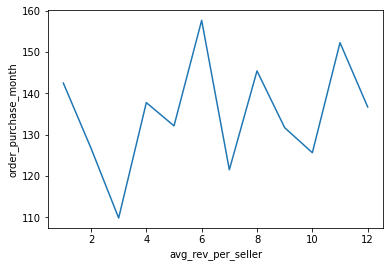

In [50]:
x=avg_seller_LTV['order_purchase_month']
y1=avg_seller_LTV['avg_rev_per_seller']
y2=avg_seller_LTV['total_sales_amt']

plt.ylabel('order_purchase_month')
plt.xlabel('avg_rev_per_seller')


plt.plot(x,y1)






In [ ]:
#revenues per orders

In [ ]:
#reputation costs (estimated) per bad reviews(**expensive to have bad review ***)

In [ ]:
#perational costs of IT system that grows with number of orders, but not linearly (scale effects)

### 1.1 (recommended) **Should Olist remove underperforming sellers from its marketplace ?** 🕵🏻

To analyse the impact of removing the worse sellers from Olist's marketplace, we will perform a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? (granted, it's hard to know in advance who is a good seller, but let's start with this and iterate later).

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

<br>

<details>
    <summary> <i>💡 Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package</i> </summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

You will orally present your insights to your favorite TA at the end of this unit `Communicate` "
</details>


In [ ]:
# aggregate volume of orders per month, then merge to existing dataset that already contains revenue and seller counts
order_count = combined.groupby('order_purchase_month', as_index=False)['count_of_orders'].sum()
monthly_perf = avg_seller_LTV.merge(order_count, on='order_purchase_month')
monthly_perf.to_csv('monthly_perf.csv',index=True)
avg_seller_LTV.info()


### 1.2 (optional): Here are other hypothesis you may want to investigate instead

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

📅 🗣 📊 You will orally present your insights to your favorite TA at the end of this unit `Communicate`